In [3]:
# Import Libraries

import numpy as np
import pandas as pd

In [4]:
# Uploading dataset

from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary.csv


In [5]:
# Loading Dataset

df = pd.read_csv("salary.csv")

In [6]:
# summarazing Dataset

print(df.head())
print(df.shape)

   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K
(32561, 5)


In [7]:
df.isnull().sum()

,0
age,0
education.num,0
capital.gain,0
hours.per.week,0
income,0


In [8]:
# Mapping income to binary value

income_set = set(df['income'])
df['income'] = df['income'].map({'<=50K' : 0, '>50K' : 1}).astype(int)
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0


In [34]:
# Segregate Dataset into 'x' and 'y'

x = df.iloc[:, :-1].values
print(x)

y = df.iloc[:, -1].values
print(y)

[[90  9  0 40]
 [82  9  0 18]
 [66 10  0 40]
 ...
 [40  9  0 40]
 [58  9  0 40]
 [22  9  0 20]]
[0 0 0 ... 1 0 0]


In [36]:
# Spilliting dataset into test and train

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [37]:
# feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

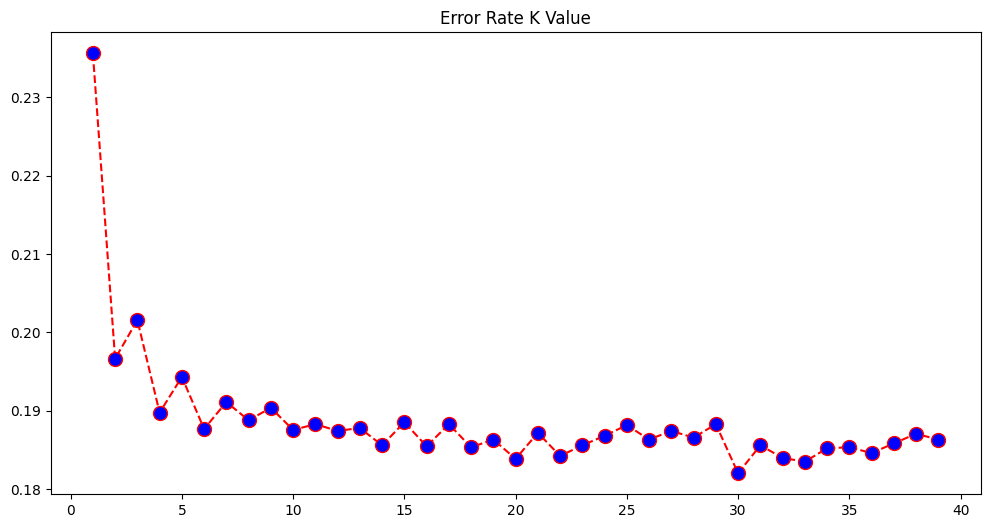

In [38]:
# Finding the best K value

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40

error = []
for i in range(1,40) :
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train, y_train)
  pred_i = model.predict(x_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize= (12, 6))
plt.plot(range(1,40), error, color = 'red', linestyle = '--', marker = 'o',
         markerfacecolor = 'blue', markersize = 10)

plt.title("Error Rate K Value")
plt.xlabel = 'K Value'
plt.ylabel = 'Mean Error'


In [46]:
# Training

model = KNeighborsClassifier(n_neighbors=16, metric = 'minkowski', p = 2)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [47]:
# Predicting, whether a new customer with age and salary will purchase or not

age = int(input("Enter new employee age : "))
edu = int(input("Enter new employee education number : "))
cg = int(input("Enter new employee capital gain : "))
wh = int(input("Enter new employee hours/week : "))

new_Emp = [[age, edu, cg, wh]]
result = model.predict(sc.transform(new_Emp))
print(result)

if result == 1 :
  print("Employee might get salary above 50K")
else :
  print("Employee might not get salary above 50K")

Enter new employee age : 25
Enter new employee education number : 16
Enter new employee capital gain : 0
Enter new employee hours/week : 25
[0]
Employee might not get salary above 50K


In [48]:
# Prediction for all test data

y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


In [49]:
# Evaluating model - Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cm)
print("Accuracy of the model : {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix : 
 [[5864  329]
 [1181  767]]
Accuracy of the model : 81.45191008475618%
